# **혼자 공부하는 머신러닝 + 딥러닝 CH4**

## **확률적 경사 하강법**

### **Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

### **데이터 준비**

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv')

In [3]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [4]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_target = fish['Species'].to_numpy()

In [5]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [6]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled =  ss.transform(test_input)

### **SGDClassifier**

In [7]:
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [8]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8235294117647058
0.875


In [9]:
sc = SGDClassifier(loss='log',random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [10]:
for _ in range(300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

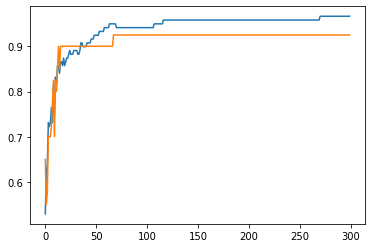

In [11]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [12]:
sc = SGDClassifier(loss ='log', random_state=42, tol=None, max_iter = 100)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [13]:
sc = SGDClassifier(loss ='hinge', random_state=42, tol=None, max_iter = 100)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


In [14]:
sc = SGDClassifier(loss = 'hinge', random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target)

for _ in range(300):
  sc.partial_fit(train_scaled, train_target,classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

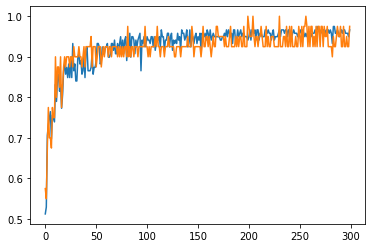

In [15]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [16]:
train_scores = np.array(train_score)
test_scores = np.array(test_score)
diff = abs(train_scores - test_scores)

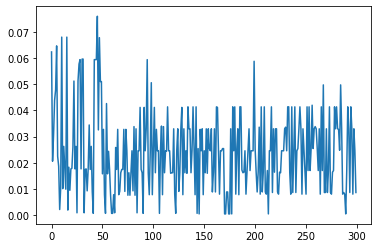

In [17]:
plt.plot(diff)

plt.show()